<a href="https://colab.research.google.com/github/OrJaku/Neural_Network/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
import numpy as np
import pandas as pd 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i,sequences] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1
    return results
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [74]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['acc'])
x_val = x_train[:1000]
partia_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partia_y_train = one_hot_train_labels[1000:]

history = model.fit(partia_x_train,
                    partia_y_train,
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val,y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 283us/step - loss: 2.6500 - acc: 0.4976 - val_loss: 1.7643 - val_acc: 0.6640
Epoch 2/7
7982/7982 [==============================] - 1s 129us/step - loss: 1.4276 - acc: 0.7088 - val_loss: 1.3156 - val_acc: 0.7200
Epoch 3/7
7982/7982 [==============================] - 1s 127us/step - loss: 1.0476 - acc: 0.7672 - val_loss: 1.1406 - val_acc: 0.7570
Epoch 4/7
7982/7982 [==============================] - 1s 131us/step - loss: 0.8238 - acc: 0.8180 - val_loss: 1.0233 - val_acc: 0.7900
Epoch 5/7
7982/7982 [==============================] - 1s 126us/step - loss: 0.6520 - acc: 0.8642 - val_loss: 0.9668 - val_acc: 0.8080
Epoch 6/7
7982/7982 [==============================] - 1s 128us/step - loss: 0.5305 - acc: 0.8898 - val_loss: 0.9487 - val_acc: 0.8040
Epoch 7/7
2246/2246 [==============================] - 0s 90us/step


(46,)
1.0
3
13
4
3


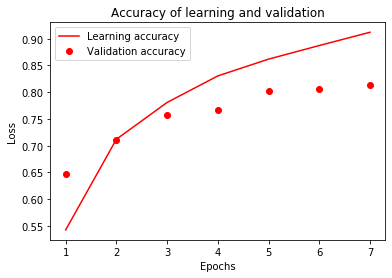

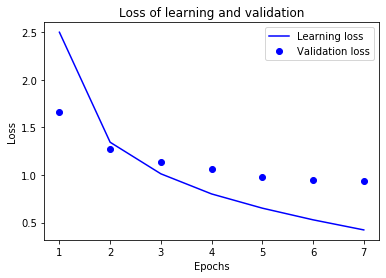

In [50]:
predictions = model.predict(x_test)
# print(predictions[0])
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs, acc, 'r', label="Learning accuracy")
plt.plot(epochs, val_acc, 'ro', label="Validation accuracy")
plt.title("Accuracy of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, loss, 'b', label="Learning loss")
plt.plot(epochs, val_loss, 'bo', label="Validation loss")
plt.title("Loss of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()